# Experiment of the MBO Scheme and Nystrom Extension

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy 
from build_laplacian import nystrom_extension, compute_eig
from build_graph import exponential_euclidian
from segmentation import purity, semi_supervised
import scipy.spatial.distance as sc
import spectral as sp
from sklearn.cluster import KMeans
from itertools import permutations

In [3]:
path_image = '../images/'
mat_img = sio.loadmat('../database/Urban_R162.mat')
mat_gt = sio.loadmat('../database/groundTruth/end4_groundTruth.mat')
bands = mat_img['SlectBands']
X= mat_img['Y'].T # important
nband = mat_img['nBand'][0][0]
maxValue = mat_img['maxValue'][0][0]
nCol = mat_img['nCol'][0][0]
nRow = mat_img['nRow'][0][0]
M =  mat_gt['M']
A = mat_gt['A'].T
cood = mat_gt['cood']
nEnd = mat_gt['nEnd'][0][0]

In [3]:
print(M.shape)
print(A.shape)
print(nEnd)
#for key in mat_gt:
#    print(key)


(162, 4)
(94249, 4)
4


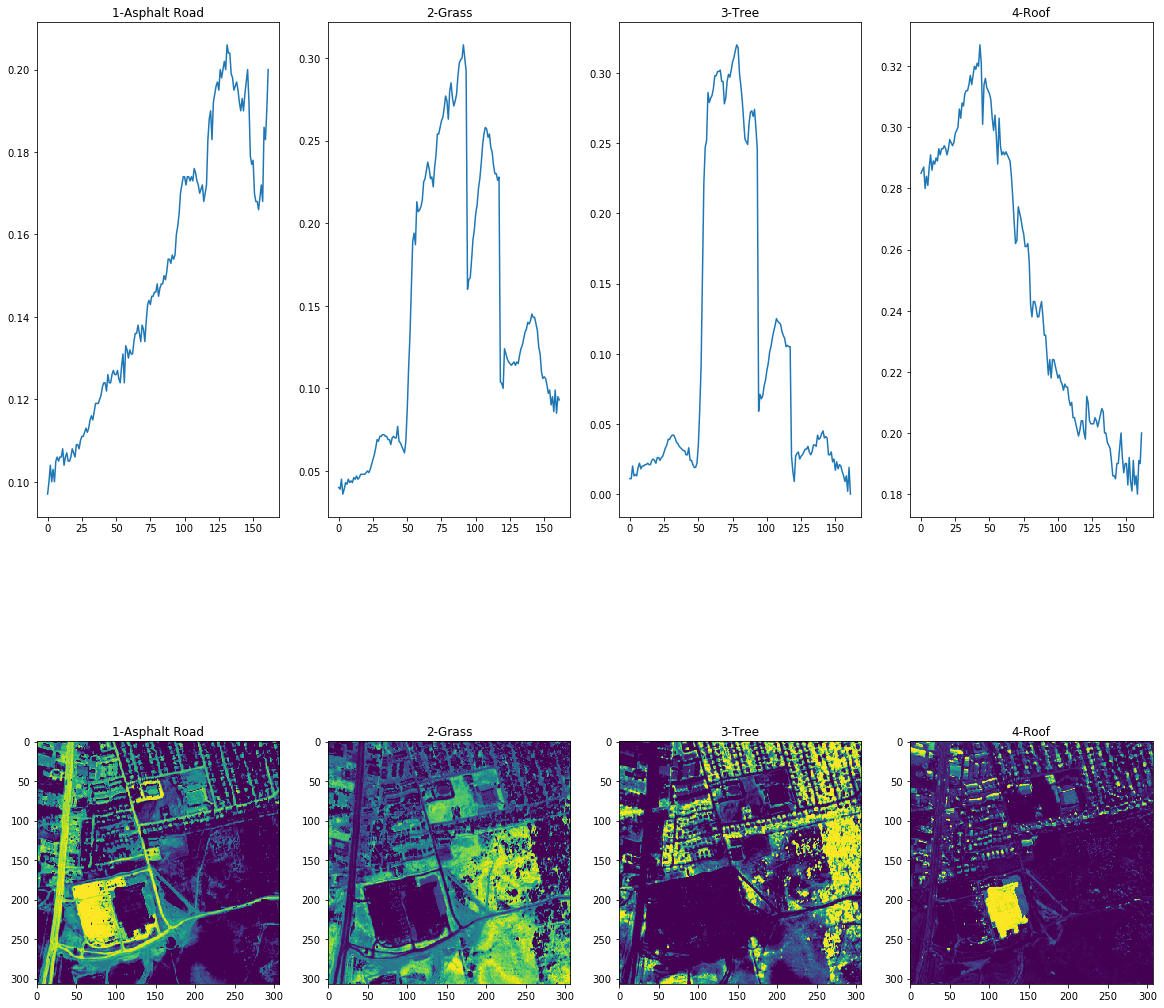

In [4]:
# disp ground truth
fig = plt.figure(figsize=(20,20))
for i in range(nEnd):
    plt.subplot(2,4,1+i)
    plt.plot(M[:,i])
    plt.title(cood[i][0][0])
    a2d = A[:,i].reshape(nRow,nCol)
    plt.subplot(2,4,1+i+nEnd)
    plt.imshow(a2d)
    plt.title(cood[i][0][0])
plt.show()

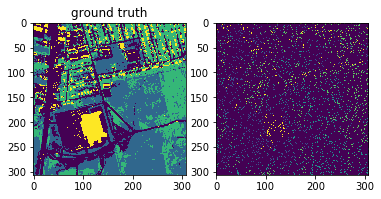

In [167]:
segm_gt = np.argmax(A,axis=1)
label = segm_gt.copy()
random_ind = np.random.permutation(segm_gt.shape[0])[0:int(segm_gt.shape[0]*0.9)]
label[random_ind] = -1
plt.subplot('121')
plt.imshow(segm_gt.reshape(nRow,nCol))
plt.title('ground truth')
plt.subplot('122')
plt.imshow(label.reshape(nRow,nCol))
plt.show()


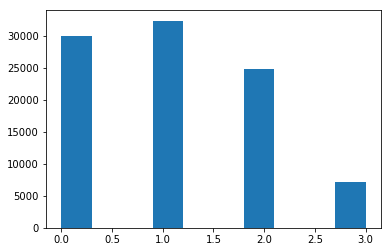

In [7]:
plt.hist(segm_gt)
plt.show()

## Test semi-supervised learning

In [168]:
segm_gt = np.argmax(A,axis=1)
label = segm_gt.copy()
random_ind = np.random.permutation(segm_gt.shape[0])[0:int(segm_gt.shape[0]*0.97)]
label[random_ind] = -1
X= mat_img['Y'].T
m=100
sigma2 = 0.05
dt=0.01
mu = 0.5
num_class=4
pure = 0.99
#Xtemp = X[0:10000]
#Wtemp = exponential_euclidian(Xtemp, 0.01, True)
# segm = semi_supervised(X,0.1,label,4,10,0.05,0.5)
print(X.shape[0]-random_ind.shape[0])
plt.imsave(path_image+'gt.png',segm_gt.reshape(nRow, nCol))

2828


1 0.277254931087
2 0.858958715742
3 0.9433627943
4 0.979384396651
5 0.987999872678
6 0.992063576271


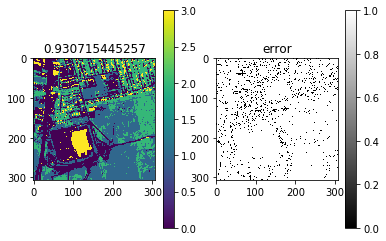

In [169]:
u = semi_supervised(X, sigma2, label, num_class, m, dt, mu, pure)
r = np.argmax(u, axis=1)
plt.subplot('121')
plt.imshow(r.reshape(nRow,nCol))
plt.title(np.sum(r==segm_gt)/len(segm_gt))
plt.colorbar()
plt.subplot('122')
plt.imshow((r==segm_gt).reshape(nRow,nCol),cmap='gray')
plt.title('error')
plt.colorbar()
plt.show()
plt.imsave(path_image+'mbo.png', r.reshape(nRow, nCol))
plt.imsave(path_image+'errormbo.png', (r==segm_gt).reshape(nRow,nCol), cmap="gray")

### variation of sigma2

1 0.321796517735
2 0.980880433745
3 0.989315536504
4 0.992413712612
1 0.324735540961
2 0.98125179047
3 0.99097072648
1 0.322475570033
2 0.980371144521
3 0.990588759562
1 0.32226336619
2 0.975012997485
3 0.987724007682
4 0.991023777441
1 0.320385362179
2 0.973909537502
3 0.988562212862
4 0.990928285711
1 0.322528620993
2 0.975341913442
3 0.987999872678
4 0.991702829738
1 0.323197063099
2 0.972445330985
3 0.987342040764
4 0.990535708602
1 0.321075024669
2 0.972551432906
3 0.988105974599
4 0.991310252629
1 0.320830990249
2 0.973336587126
3 0.987246549035
4 0.990493267833
1 0.320098886991
2 0.974164182113
3 0.989676283037
4 0.99249859415
1 0.322337637535
2 0.970705259472
3 0.986885802502
4 0.990546318794
1 0.319366783732
2 0.974164182113
3 0.988731975936
4 0.991670999162
1 0.322433129264
2 0.969506307759
3 0.986620547698
4 0.990546318794
1 0.321594924084
2 0.970259631402
3 0.985230612526
4 0.989273095736
5 0.991193540515
1 0.321223567359
2 0.972646924636
3 0.987968042101
4 0.990365945527
1

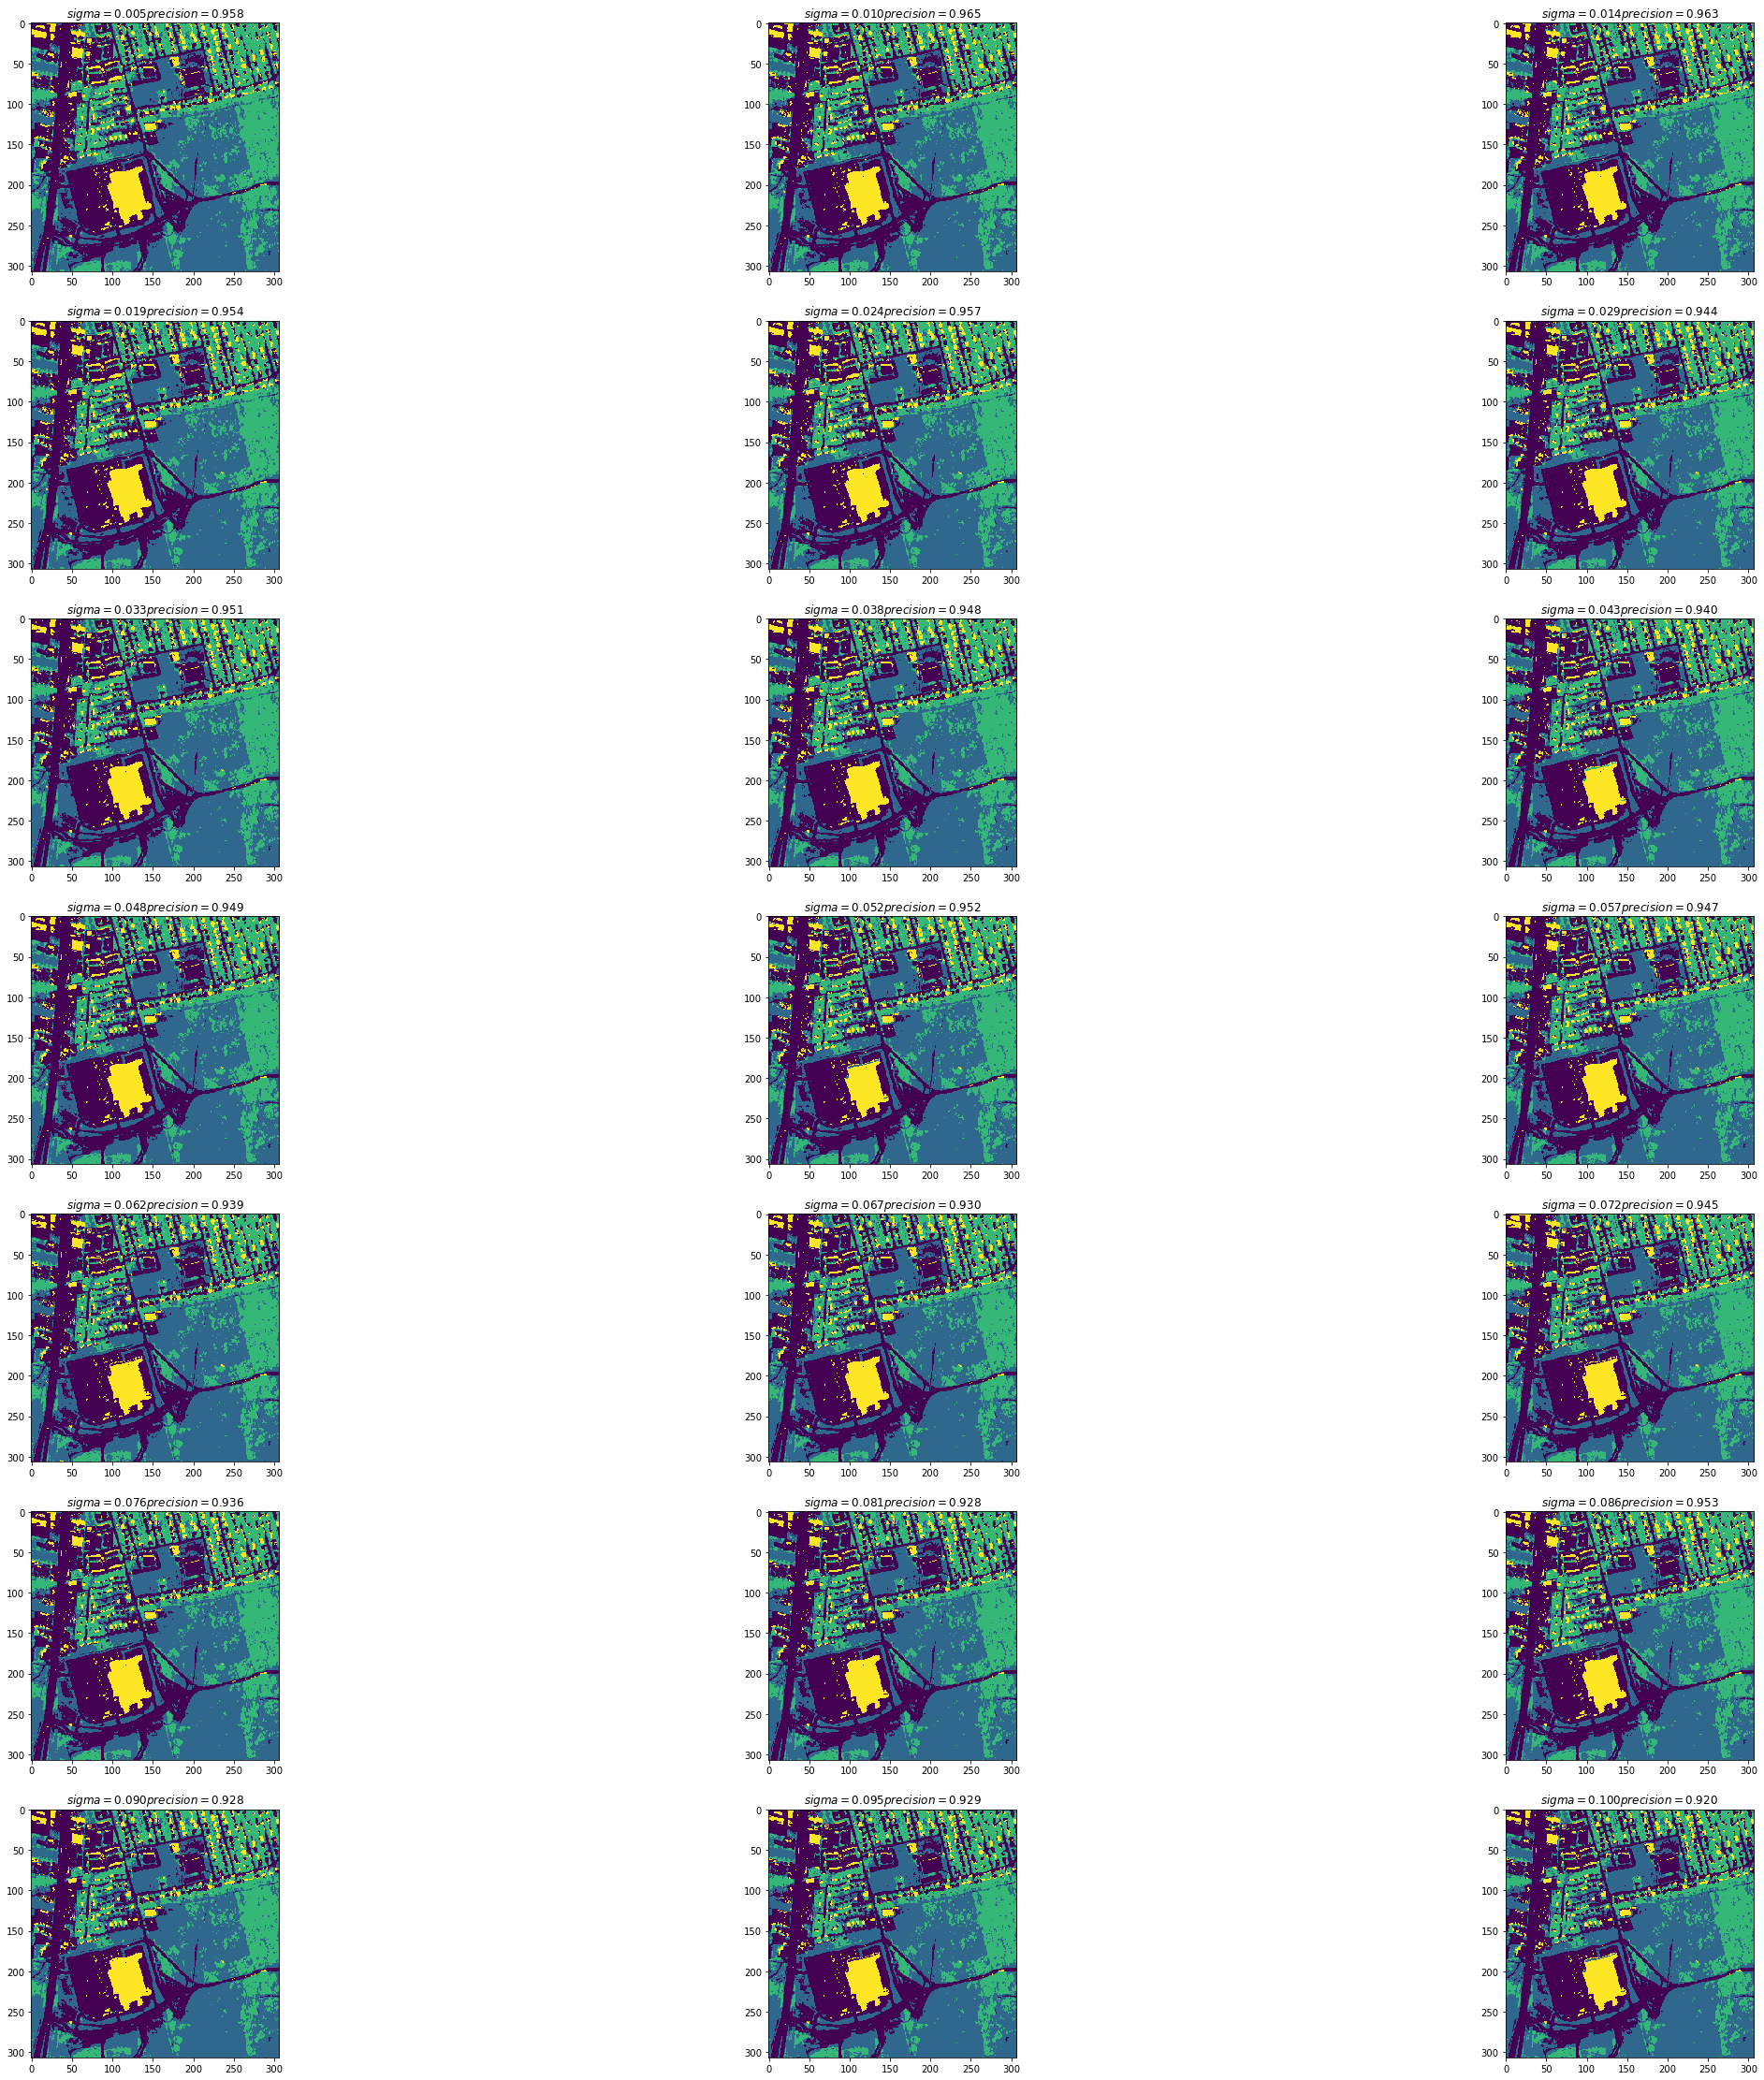

In [15]:
fig = plt.figure(figsize=(40,40))
list_sigma = np.linspace(0.005,0.1,21)
for ind, sigm in enumerate(list_sigma):
    u = semi_supervised(X, sigm, label, num_class, m, dt, mu, pure)
    r = np.argmax(u, axis=1)
    plt.subplot(7,3,ind+1)
    plt.imshow(r.reshape(nRow,nCol))
    plt.title("$\sigma=%0.3f$ et $precision= %0.3f$"%(sigm, np.sum(r==segm_gt)/len(segm_gt)))
plt.show()    

Conclusion : sigma is not so interesting. sigma small here seems better but we have approximatly the same performance.

### Variation of $\mu$

1 0.323897335781
2 0.978461309934
3 0.988466721132
4 0.992530424726
1 0.320671837367
2 0.980997145858
3 0.990376555719
1 0.323876115396
2 0.982885760061
3 0.992042355887
1 0.324077709047
2 0.984010440429
3 0.991745270507
1 0.31930312258
2 0.977495782449
3 0.989071502085
4 0.99225455973
1 0.323897335781
2 0.98110324778
3 0.991639168585
1 0.321552483315
2 0.978662903585
3 0.989495909771
4 0.992933612028
1 0.322252755997
2 0.982514403336
3 0.991352693397
1 0.32118112659
2 0.975638998822
3 0.990037029571
1 0.318708951819
2 0.979883075683
3 0.990482657641
1 0.323218283483
2 0.98549586733
3 0.993018493565
1 0.324226251737
2 0.983172235249
3 0.990631200331
1 0.320321701026
2 0.979670871839
3 0.988922959395
4 0.993060934334
1 0.323525979055
2 0.981241180278
3 0.990991946864
1 0.321340279472
2 0.979384396651
3 0.989633842269
4 0.992976052796


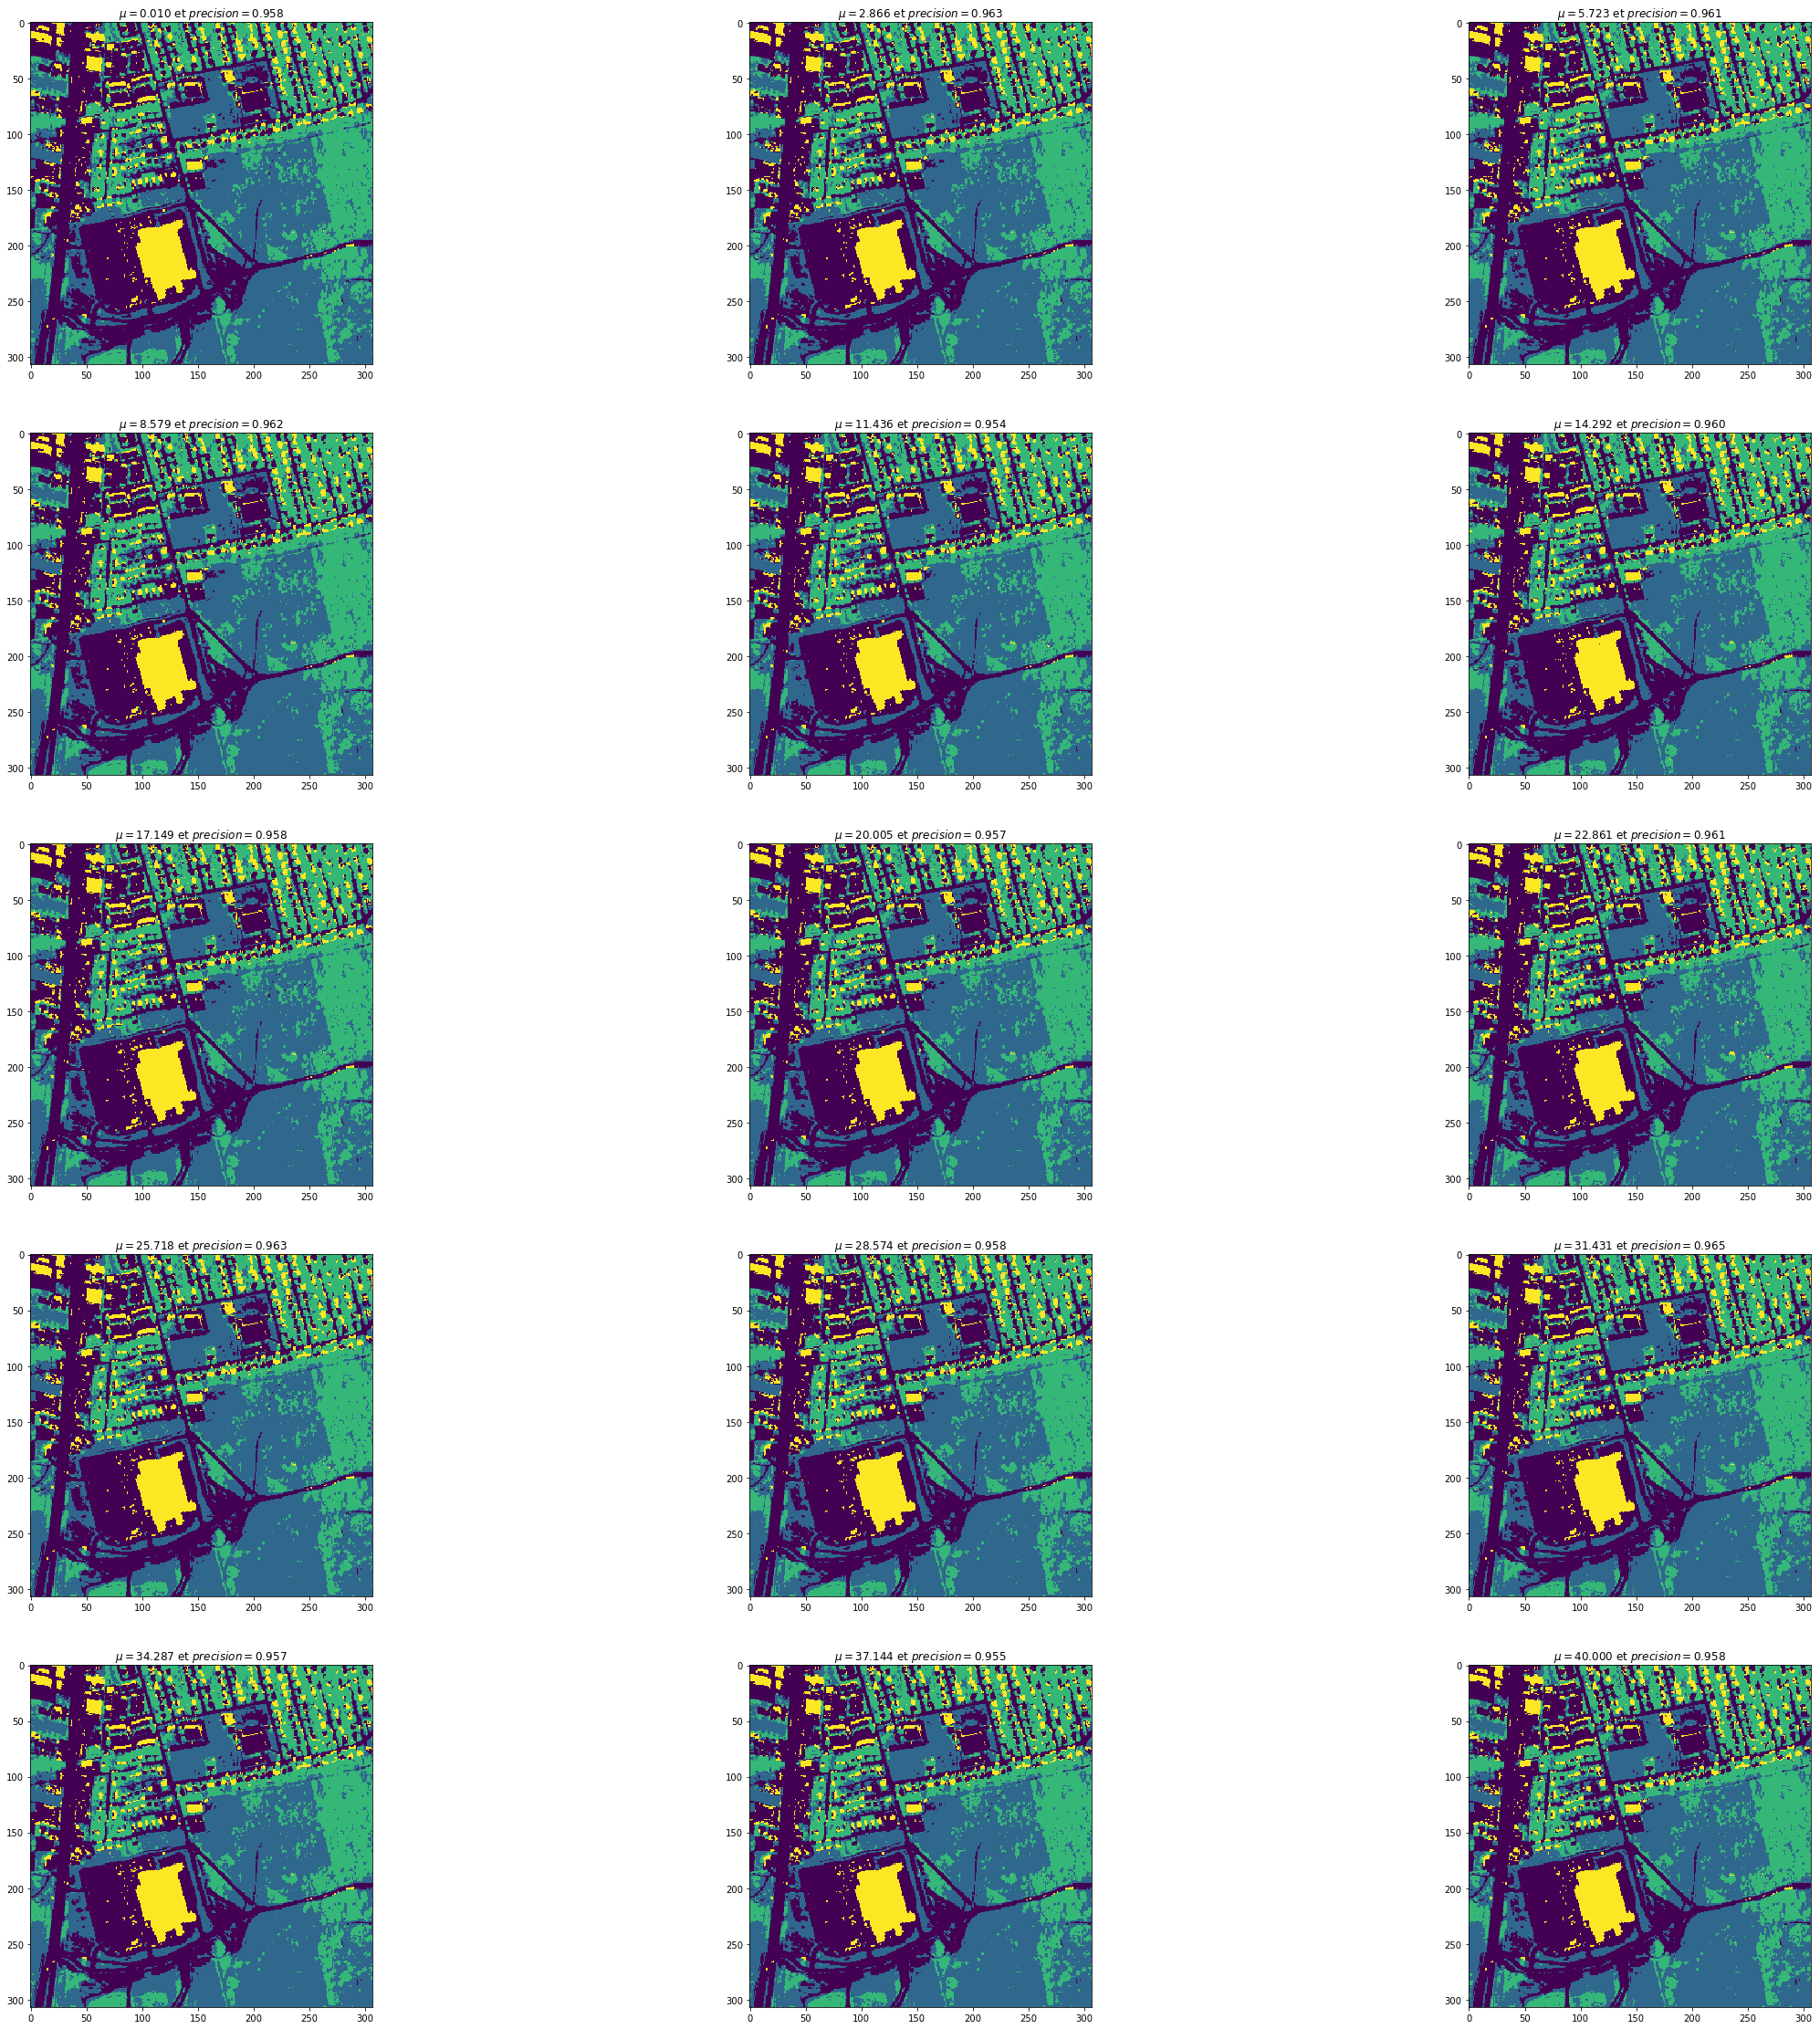

In [20]:
fig = plt.figure(figsize=(40,40))
list_mu = np.linspace(0.01,40,15)
for ind, lmu in enumerate(list_mu):
    u = semi_supervised(X, sigma2, label, num_class, m, dt, lmu, pure)
    r = np.argmax(u, axis=1)
    plt.subplot(5,3,ind+1)
    plt.imshow(r.reshape(307,307))
    plt.title("$\mu=%0.3f$ et $precision= %0.3f$"%(lmu, np.sum(r==segm_gt)/len(segm_gt)))
plt.show()

1 0.267939182379
2 0.832889473628
3 0.869728060775
4 0.906757631381
5 0.934842810003
6 0.950397351696
7 0.95801546966
8 0.971150887543
9 0.979023650118
10 0.983310167747
11 0.985177561566
12 0.985612579444
13 0.98672664962
14 0.988827467665
15 0.989973368418
16 0.991373913782


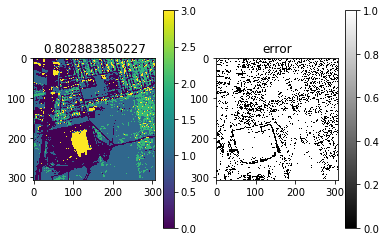

In [78]:
u = semi_supervised(X, sigma2, label, num_class, m, dt, 0, pure)
r = np.argmax(u, axis=1)
plt.subplot('121')
plt.imshow(r.reshape(307,307))
plt.title(np.sum(r==segm_gt)/len(segm_gt))
plt.colorbar()
plt.subplot('122')
plt.imshow((r==segm_gt).reshape(307,307), cmap='gray')
plt.title('error')
plt.colorbar()
plt.show()

### Variation of dt

In [11]:
fig = plt.figure(figsize=(40,40))
list_dt = np.linspace(0.01,2,15)
for ind, ldt in enumerate(list_dt):
    u = semi_supervised(X, sigma2, label, num_class, m, ldt, mu, pure)
    r = np.argmax(u, axis=1)
    plt.subplot(5,3,ind+1)
    plt.imshow(r.reshape(307,307))
    plt.title("$dt=%0.3f$ et $precision= %0.3f$"%(ldt, np.sum(r==segm_gt)/len(segm_gt)))
plt.show()   

1 0.27145115598
2 0.863255843563
3 0.935882608834
4 0.962567242093
5 0.971267599656
6 0.976509034579
7 0.981336672007
8 0.986694819043
9 0.990344725143
1 0.273742957485
2 0.856422879818
3 0.944285881017
4 0.970440004668
5 0.980763721631
6 0.987044955384
7 0.98914577343
8 0.989920317457
9 0.990832793982
1 0.274750925739
2 0.87892709737
3 0.957209095057
4 0.977527613025
5 0.984562170421
6 0.98692824327
7 0.987575464992
8 0.988063533831
9 0.988233296905
10 0.98914577343
11 0.989220044775
12 0.989580791308
13 0.989665672845
14 0.989973368418
15 0.990164351876
1 0.274963129582
2 0.864942864115
3 0.94913473883
4 0.969814003332
5 0.97706076457
6 0.979808804337
7 0.982026334497
8 0.983448100245
9 0.983299557555
10 0.981782300077
11 0.978206665323
12 0.967872338168
13 0.969485087375
14 0.975851202665
15 0.986164309436
16 0.993814257976
1 0.272119598086
2 0.879924455432
3 0.954949124129
4 0.974206622882
5 0.978238495899
6 0.980880433745
7 0.979893685875
8 0.978599242432
9 0.9766151365
10 0.97545

KeyboardInterrupt: 

## Spectral clustering

In [66]:
def change_color(y, segm_gt, num_class):
    
    a = np.arange(num_class)
    score_b = np.sum(y==segm_gt)/len(segm_gt)
    perms = set(permutations(a))
    y_best = y.copy()
    
    for p in perms:
        y_t = -1 * np.ones(y.shape, dtype=int)
        for i in range(num_class):
            y_t[y==i] = p[i]
        if(score_b < np.sum(y_t==segm_gt)/len(segm_gt)):
            y_best = y_t
            score_b = np.sum(y_best==segm_gt)/len(segm_gt)
    return y_best

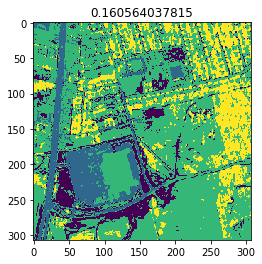

In [78]:
sigma2 = 0.01
m = 100
S, V = nystrom_extension(X, m, sigma2, cosine=True)
km = KMeans(n_clusters=4)
km.fit(V)
y = km.predict(V)
#y = change_color(y, segm_gt, num_class)
plt.imshow(y.reshape(nRow,nCol))
plt.title(np.sum(y==segm_gt)/len(segm_gt))
plt.show()

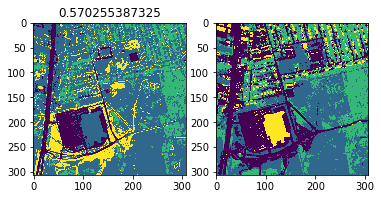

In [79]:
y_b = change_color(y, segm_gt, num_class)
plt.subplot('121')
plt.imshow(y_b.reshape(nRow,nCol))
plt.title(np.sum(y_b==segm_gt)/len(segm_gt))
plt.subplot('122')
plt.imshow(segm_gt.reshape(nRow,nCol))
plt.show()

In [80]:
plt.title(np.sum(y_b==segm_gt)/len(segm_gt))
plt.imsave(path_image+'scworse.png',y_b.reshape(307, 307))

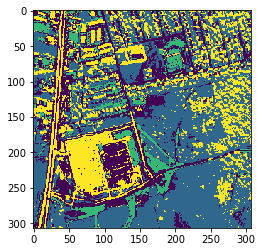

In [56]:
Xnorm = (X - X.mean(axis=0))/X.std()
km.fit(X)
y= km.predict(X)
plt.imshow(y.reshape(307,307))
plt.show()

6.0751738152338266

## Stability of the method

In [196]:

segm_gt = np.argmax(A,axis=1)
label = segm_gt.copy()
random_ind = np.random.permutation(segm_gt.shape[0])[0:int(segm_gt.shape[0]*0.99)]
label[random_ind] = -1
X= mat_img['Y'].T
m=20
sigma2 = 0.05
dt=0.01
mu = 0.5
num_class=4
pure = 0.99
score = []
for i in range(10):
    u = semi_supervised(X, sigma2, label, num_class, m, dt, mu, pure)
    r = np.argmax(u, axis=1)
    score.append(np.sum(r==segm_gt)/len(segm_gt))
print('--------------------------------')
print(np.mean(score))
print(np.std(score))

1 0.258687094823
2 0.886874131291
3 0.933017856953
4 0.956763466986
5 0.968615051619
6 0.968498339505
7 0.964286093221
8 0.979883075683
9 0.98998397861
10 0.993230697408
1 0.259090282125
2 0.903213827202
3 0.951320438413
4 0.966089825887
5 0.975490456132
6 0.980466636251
7 0.98361786332
8 0.984944137338
9 0.985135120797
10 0.984074101582
11 0.982291589301
12 0.984562170421
13 0.989251875351
14 0.990779743021
1 0.258347568674
2 0.850290188755
3 0.917314772571
4 0.935681015183
5 0.958026079852
6 0.971766278687
7 0.9729652304
8 0.971214548695
9 0.978450699742
10 0.985899054632
11 0.989018451124
12 0.991002557056
1 0.260787912869
2 0.867033071969
3 0.919786947342
4 0.940964890874
5 0.956593703912
6 0.974652250952
7 0.981835351038
8 0.982355250454
9 0.986991904423
10 0.99111926917
1 0.257573024647
2 0.863722692018
3 0.938938344173
4 0.954683869325
5 0.967214506255
6 0.976572695732
7 0.980604568749
8 0.987479973262
9 0.990535708602
1 0.259588961156
2 0.848613778396
3 0.915914227207
4 0.95651

In [4]:
list_m = [10,20,30,50,70,100,200]
mea = [0.85, 0.90, 0.89, 0.87,0.89,0.88,0.85]
plt.plot(list_m, mea)
plt.xlabel('fraction of labeled data')
plt.ylabel('mean of the result with 10 repetitions')
#plt.show()
plt.savefig(path_image + 'stablem.png')

In [197]:
frac = [0.1,1,2,3,5,10,20]
mea = [0.35,0.76,0.88,0.91,0.93,0.94,0.95]
plt.plot(frac, mea)
plt.xlabel('fraction of labeled data')
plt.ylabel('mean of the result with 10 repetitions')
#plt.show()
plt.savefig(path_image + 'stable.png')

## KSC dataset

(512, 614, 176)
(512, 614)


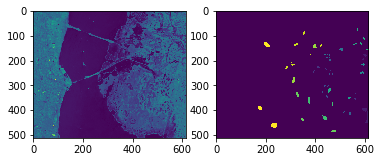

13


In [146]:
# We will use here the Kennedy  Space Center
mat_img_ksc = sio.loadmat('../database/KSC/KSC.mat')

KSC = mat_img_ksc['KSC']
mat_gt_ksc = sio.loadmat('../database/KSC/KSC_gt.mat')
KSC_label = mat_gt_ksc['KSC_gt']
print(KSC.shape)
print(KSC_gt.shape)
row, col, band = KSC.shape
plt.subplot('121')
plt.imshow(KSC[:,:,50])
plt.subplot('122')
plt.imshow(KSC_label)
plt.show()
X_KSC = KSC.reshape(row*col, band)
label = KSC_label.reshape(row*col).astype(np.int)
label = label-1
num_class = np.max(np.unique(np.sort(label)))+1
print(num_class)

In [147]:
u_ksc = semi_supervised(X_KSC, sigma2, label, num_class, m, dt, mu, pure)

1 0.0914755954805
2 0.755076852606
3 0.891932384976
4 0.931157115228
5 0.951060540513
6 0.962582069422
7 0.96833329092
8 0.970372302524
9 0.972576725366
10 0.977224144951
11 0.975840416327
12 0.983980557818
13 0.986226333469
14 0.986875254479
15 0.987505089577
16 0.988748854845
17 0.988774302728
18 0.988984247761
19 0.989082858306
20 0.98912103013
21 0.989582273005
22 0.989868561686
23 0.991385891694


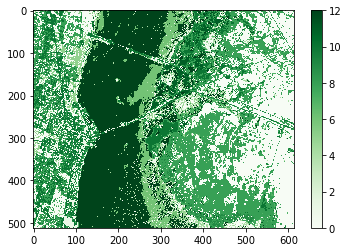

In [164]:
r = np.argmax(u_ksc, axis=1)
plt.imshow(r.reshape(row, col), cmap='Greens')
plt.colorbar()
plt.show()
plt.imsave(path_image+'ksc.png', r.reshape(row, col), cmap='Greens')
plt.imsave(path_image+'ksc_gt.png', KSC_label)
plt.imsave(path_image+'ksc50.png', KSC[:,:,50])